In [1]:
!pip install pycaret

  Using cached scipy-1.5.4-cp38-cp38-manylinux1_x86_64.whl (25.8 MB)
  Using cached numpy-1.19.5-cp38-cp38-manylinux2010_x86_64.whl (14.9 MB)


     |████████████████████████████████| 288 kB 13.9 MB/s            
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.0
    Uninstalling numpy-1.20.0:
      Successfully uninstalled numpy-1.20.0
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 1.0.1
    Uninstalling Werkzeug-1.0.1:
      Successfully uninstalled Werkzeug-1.0.1
  Attempting uninstall: scipy
    Found existing installation: scipy 1.6.0
    Uninstalling scipy-1.6.0:
      Successfully uninstalled scipy-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.4.1 requires grpcio~=1.32.0, but you have grpcio 1.35.0 which is incompatible.
nni 2.3 requires scikit-learn>=0.24.1, but you have scikit-learn 0.23.2 which is incompatible.
mljar-supervised 0.10.6 requires numpy>=1.20.0, but you have numpy 1.19.5 which is incompatible.
mljar-sup

In [2]:
import pandas as pd
df = pd.read_csv('train.csv')

In [3]:
df

,reg_count,column1,column2,column3,column4,column5,column6,column7,column8,column9,column10,y
0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0
2,2,0,0,1,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
295,9,0,0,0,0,0,0,1,0,0,0,1
296,0,0,0,0,0,0,0,1,0,0,0,0
297,0,0,0,0,0,0,0,0,0,0,0,0
298,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
from pycaret.classification import *
exp1 = setup(df, target = 'y')

,Description,Value
0,session_id,2613
1,Target,y
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(300, 12)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
# 모델 비교
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.9852,0.0000,0.9833,0.9750,0.9766,0.9660,0.9686,0.0020
gbc,Gradient Boosting Classifier,0.9852,0.9876,0.9833,0.9750,0.9766,0.9660,0.9686,0.0070
catboost,CatBoost Classifier,0.9852,0.9842,0.9833,0.9750,0.9766,0.9660,0.9686,0.4800
knn,K Neighbors Classifier,0.9805,0.9869,0.9500,0.9833,0.9652,0.9516,0.9530,0.0760
dt,Decision Tree Classifier,0.9805,0.9845,0.9667,0.9750,0.9675,0.9537,0.9570,0.0030
rf,Random Forest Classifier,0.9805,0.9858,0.9667,0.9750,0.9675,0.9537,0.9570,0.0220
lda,Linear Discriminant Analysis,0.9805,0.9897,0.9500,0.9833,0.9652,0.9516,0.9530,0.0020
et,Extra Trees Classifier,0.9805,0.9851,0.9667,0.9750,0.9675,0.9537,0.9570,0.0190
ridge,Ridge Classifier,0.9757,0.0000,0.9333,0.9833,0.9542,0.9380,0.9413,0.0030
ada,Ada Boost Classifier,0.9757,0.9706,0.9500,0.9750,0.9566,0.9401,0.9453,0.0090


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=2613, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [7]:
# 모델 생성
gboost = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9524,0.9056,0.8333,1.0000,0.9091,0.8772,0.8839
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.9000,0.9702,1.0000,0.7500,0.8571,0.7826,0.8018


In [9]:
# 모델 자체를 하이퍼 파라미터로 사용하여 튜닝
tuned_gboost = tune_model(gboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9524,0.9167,0.8333,1.0000,0.9091,0.8772,0.8839
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.9000,0.9524,1.0000,0.7500,0.8571,0.7826,0.8018


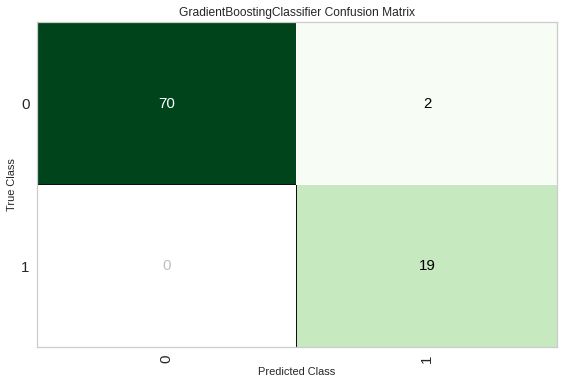

In [10]:
# Matrix 시각화
plot_model(estimator = tuned_gboost, plot = 'confusion_matrix')

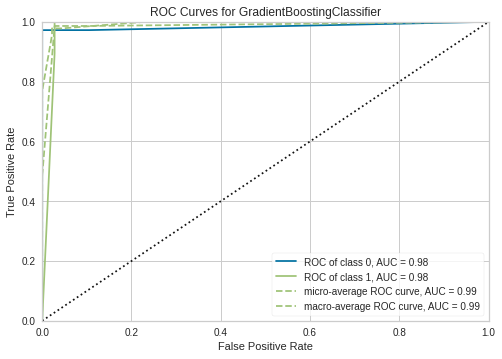

In [11]:
plot_model(estimator = tuned_gboost, plot = 'auc')

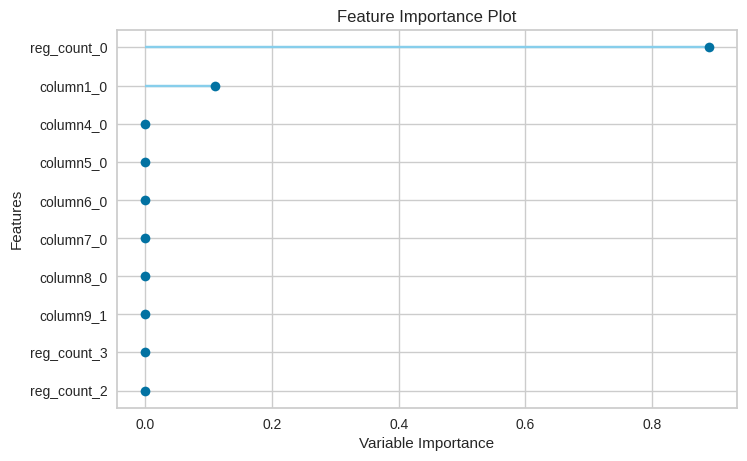

In [12]:
# Feature Importance 확인
# 당연히 reg_count가 높을 수 밖에 없음
plot_model(estimator = tuned_gboost, plot = 'feature')

In [13]:
# 모델 평가
evaluate_model(tuned_gboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
# 모델을 사용하여 예측
test = pd.read_csv('test.csv')
ada_final = finalize_model(tuned_adaboost)
predict_model(ada_final,test)

In [14]:
# 모델 저장
save_model(tuned_gboost, 'tuned_adaboost_211111')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='y',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                             learning_rate=0.5, loss='deviance',
                                             max_depth=7, max_features=1.0,
                                             max_leaf_nodes=None,
                                             min_im